In [ ]:
#!pip install --upgrade google-cloud-vision

# Deben crear una cuenta en Google Cloud Platform y generar un key:
# https://console.cloud.google.com/apis/credentials/serviceaccountkey

#set GOOGLE_APPLICATION_CREDENTIALS=r"C:/Users/XPC/Desktop/SLR-BOX-26c1d53e6bf0.json"

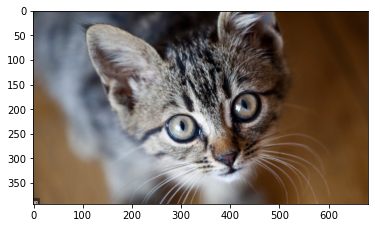

In [4]:
import os
from skimage import io
import matplotlib.pyplot as plt

img = "img/gato.PNG"

image = io.imread(img)
plt.imshow(image)
plt.show()

## Labels

In [3]:
import os 
import io
# Imports the Google Cloud client library
from google.cloud import vision

# Instantiates a client
client = vision.ImageAnnotatorClient()

# The name of the image file to annotate
file_name = os.path.abspath('img/gato.PNG')

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

# Performs label detection on the image file
response = client.label_detection(image=image)
labels = response.label_annotations

print('Labels:')
for label in labels:
    print(label.description)

Labels:
Brown
Skin
Whiskers
Organism
Vertebrate
Carnivore
Felidae
Small to medium-sized cats
Cat
Facial expression


## Labels con Porcentajes

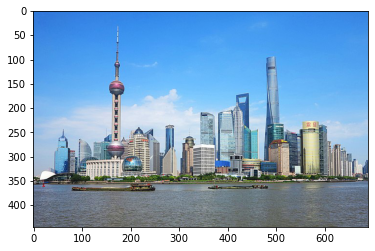

In [5]:
from skimage import io
import matplotlib.pyplot as plt

img = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Shanghai_skyline_from_the_bund.jpg/690px-Shanghai_skyline_from_the_bund.jpg"

image = io.imread(img)
plt.imshow(image)
plt.show()

In [6]:
from __future__ import print_function
from google.cloud import vision

image_uri = 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Shanghai_skyline_from_the_bund.jpg/690px-Shanghai_skyline_from_the_bund.jpg'

client = vision.ImageAnnotatorClient()
image = vision.Image()
image.source.image_uri = image_uri

response = client.label_detection(image=image)

print('Labels (and confidence score):')
print('=' * 30)
for label in response.label_annotations:
    print(label.description, '(%.2f%%)' % (label.score*100.))

Labels (and confidence score):
Tower block (97.89%)
Daytime (97.79%)
Sky (97.78%)
Tower (97.63%)
City (96.98%)
Metropolitan area (96.67%)
Urban area (96.53%)
Skyscraper (95.97%)
Cityscape (95.21%)
Metropolis (94.98%)


## Deteccion de Texto

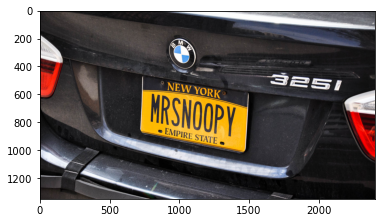

In [7]:
from skimage import io
import matplotlib.pyplot as plt

img = "https://media.wired.com/photos/5e2b52d1097df7000896da19/16:9/w_2399,h_1349,c_limit/Transpo-licenseplates-502111737.jpg"

image = io.imread(img)
plt.imshow(image)
plt.show()

In [8]:
from __future__ import print_function
from google.cloud import vision

image_uri = 'https://media.wired.com/photos/5e2b52d1097df7000896da19/16:9/w_2399,h_1349,c_limit/Transpo-licenseplates-502111737.jpg'

client = vision.ImageAnnotatorClient()
image = vision.Image()
image.source.image_uri = image_uri

response = client.text_detection(image=image)

for text in response.text_annotations:
    print('=' * 30)
    print(text.description)
    vertices = ['(%s,%s)' % (v.x, v.y) for v in text.bounding_poly.vertices]
    print('bounds:', ",".join(vertices))

M
3251
NEW YORK
MRSNOOPY
EMPIRE STATE

bounds: (743,208),(2174,208),(2174,957),(743,957)
M
bounds: (982,208),(1032,216),(1025,257),(975,248)
3251
bounds: (1780,447),(2174,489),(2162,594),(1769,551)
NEW
bounds: (903,503),(1104,535),(1093,604),(892,572)
YORK
bounds: (1130,540),(1301,567),(1290,635),(1119,608)
MRSNOOPY
bounds: (784,560),(1421,674),(1380,901),(743,787)
EMPIRE
bounds: (897,840),(1096,878),(1088,923),(888,885)
STATE
bounds: (1115,879),(1275,910),(1266,957),(1106,926)


## Landmarks

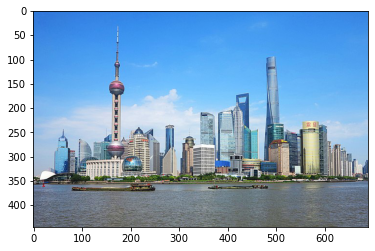

In [9]:
from skimage import io
import matplotlib.pyplot as plt

img = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Shanghai_skyline_from_the_bund.jpg/690px-Shanghai_skyline_from_the_bund.jpg"

image = io.imread(img)
plt.imshow(image)
plt.show()

In [10]:
from __future__ import print_function
from google.cloud import vision

image_uri = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Shanghai_skyline_from_the_bund.jpg/690px-Shanghai_skyline_from_the_bund.jpg"

client = vision.ImageAnnotatorClient()
image = vision.Image()
image.source.image_uri = image_uri

response = client.landmark_detection(image=image)

for landmark in response.landmark_annotations:
    print('=' * 30)
    print(landmark)

mid: "/m/02bbzq"
description: "Pudong Skyline"
score: 0.62608254
bounding_poly {
  vertices {
    x: 138
    y: 58
  }
  vertices {
    x: 502
    y: 58
  }
  vertices {
    x: 502
    y: 251
  }
  vertices {
    x: 138
    y: 251
  }
}
locations {
  lat_lng {
    latitude: 31.240444000000004
    longitude: 121.48612999999999
  }
}

mid: "/m/02bbzq"
description: "The Bund"
score: 0.43504563
bounding_poly {
  vertices {
    x: 156
    y: 78
  }
  vertices {
    x: 331
    y: 78
  }
  vertices {
    x: 331
    y: 331
  }
  vertices {
    x: 156
    y: 331
  }
}
locations {
  lat_lng {
    latitude: 31.243685
    longitude: 121.452484
  }
}

mid: "/m/02bbzq"
description: "The Bund"
score: 0.2573524
bounding_poly {
  vertices {
    x: 276
    y: 165
  }
  vertices {
    x: 553
    y: 165
  }
  vertices {
    x: 553
    y: 289
  }
  vertices {
    x: 276
    y: 289
  }
}
locations {
  lat_lng {
    latitude: 31.236875
    longitude: 121.462097
  }
}



## Deteccion Facial - Emociones

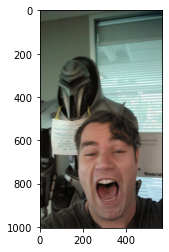

In [11]:
from skimage import io
import matplotlib.pyplot as plt

img = "https://storage.googleapis.com/cloud-vision-codelab/face_surprise.jpg"

image = io.imread(img)
plt.imshow(image)
plt.show()

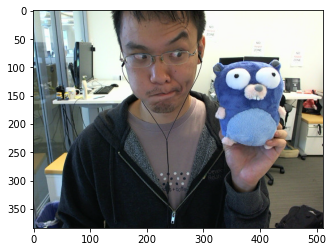

In [12]:
img = "https://storage.googleapis.com/cloud-vision-codelab/face_no_surprise.png"

image = io.imread(img)
plt.imshow(image)
plt.show()

In [13]:
from __future__ import print_function
from google.cloud import vision

uri_base = 'gs://cloud-vision-codelab'
pics = ('face_surprise.jpg', 'face_no_surprise.png')

client = vision.ImageAnnotatorClient()
image = vision.Image()

for pic in pics:
    image.source.image_uri = '%s/%s' % (uri_base, pic)
    response = client.face_detection(image=image)

    print('=' * 30)
    print('File:', pic)
    for face in response.face_annotations:
        likelihood = vision.Likelihood(face.surprise_likelihood)
        vertices = ['(%s,%s)' % (v.x, v.y) for v in face.bounding_poly.vertices]
        print('Face surprised:', likelihood.name)
        print('Face bounds:', ",".join(vertices))

File: face_surprise.jpg
Face surprised: LIKELY
Face bounds: (93,425),(520,425),(520,922),(93,922)
File: face_no_surprise.png
Face surprised: VERY_UNLIKELY
Face bounds: (120,0),(334,0),(334,198),(120,198)
